In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
#Get list of tickers for S&P 500 stocks
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
tickers = df['Symbol'].tolist()

#Set start and end dates 
end_date = datetime.strptime('2023-05-08', '%Y-%m-%d')
start_date = datetime.strptime('2022-05-07', '%Y-%m-%d')

#Download returns of each stock in the s&p500
data = []
for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)
        history = stock.history(start=start_date, end=end_date)
        if not history.empty:
            #Calculate daily returns
            history['Return'] = history['Close'] / history['Close'].shift(1) - 1
            for index, row in history.iterrows():
                #Dates of the returns are already shifted back because we want to use 
                #them with comments of the day before
                if pd.to_datetime(index.strftime('%Y-%m-%d')).weekday()==0:
                    #If it is monday we shift it back to the friday before
                    date = pd.to_datetime(index.strftime('%Y-%m-%d'))-timedelta(days=3)
                else:
                    #Otherwise we just shift the date back by one day 
                    date = pd.to_datetime(index.strftime('%Y-%m-%d'))-timedelta(days=1)
                stock_return = row['Return']
                data.append([date, ticker, stock_return])

            print(f"Retrieved data for {ticker}")
        else:
            print(f"No data available for {ticker}")
    except:
        print(f"Error retrieving data for {ticker}")

# Create a DataFrame from the collected data
df = pd.DataFrame(data, columns=['date', 'ticker', 'return'])

df['date']=pd.to_datetime(df['date'])
df=df.dropna()

Retrieved data for MMM
Retrieved data for AOS
Retrieved data for ABT
Retrieved data for ABBV
Retrieved data for ACN
Retrieved data for ATVI
Retrieved data for ADM
Retrieved data for ADBE
Retrieved data for ADP
Retrieved data for AAP
Retrieved data for AES
Retrieved data for AFL
Retrieved data for A
Retrieved data for APD
Retrieved data for AKAM
Retrieved data for ALK
Retrieved data for ALB
Retrieved data for ARE
Retrieved data for ALGN
Retrieved data for ALLE
Retrieved data for LNT
Retrieved data for ALL
Retrieved data for GOOGL
Retrieved data for GOOG
Retrieved data for MO
Retrieved data for AMZN
Retrieved data for AMCR
Retrieved data for AMD
Retrieved data for AEE
Retrieved data for AAL
Retrieved data for AEP
Retrieved data for AXP
Retrieved data for AIG
Retrieved data for AMT
Retrieved data for AWK
Retrieved data for AMP
Retrieved data for ABC
Retrieved data for AME
Retrieved data for AMGN
Retrieved data for APH
Retrieved data for ADI
Retrieved data for ANSS
Retrieved data for AON
R

In [3]:
#We download the data obtained from the previous code with comments and the respective scores
data1=pd.read_csv('data_with_scores.csv')
data1.rename(columns={'name':'ticker'},inplace=True)
data1['date']=pd.to_datetime(data1['date'])
#If a comment is made on the weekend we set its date to be the previous friday
#In this way we will use them with the return of the next monday
for i in range(len(data1)):
    if data1['date'][i].weekday()==5:
        data1['date'][i]=data1['date'][i]-timedelta(days=1)
    if data1['date'][i].weekday()==6:
        data1['date'][i]=data1['date'][i]-timedelta(days=2)



/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/789894993.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['date'][i]=data1['date'][i]-timedelta(days=2)
/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/789894993.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['date'][i]=data1['date'][i]-timedelta(days=1)


In [4]:
bert_data1=pd.read_csv('nn.csv')
bert_data1.rename(columns={'name':'ticker'},inplace=True)
bert_data1['date']=pd.to_datetime(bert_data1['date'])
for i in range(len(bert_data1)):
    if bert_data1['date'][i].weekday()==5:
        bert_data1['date'][i]=bert_data1['date'][i]-timedelta(days=1)
    if bert_data1['date'][i].weekday()==6:
        bert_data1['date'][i]=bert_data1['date'][i]-timedelta(days=2)

/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/377951404.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_data1['date'][i]=bert_data1['date'][i]-timedelta(days=2)
/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/377951404.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_data1['date'][i]=bert_data1['date'][i]-timedelta(days=1)


In [5]:
weights = pd.read_excel("Book1.xlsx")
#We merge the data with the weights of each stock in the s&p500
data2=pd.merge(weights,data1, on="ticker", how="right")
#We merge the data with comments with score with the data with 
#returns for each stock
data=pd.merge(df,data2,on=['ticker','date'],how='right')

In [6]:
bert_data2=pd.merge(weights,bert_data1, on="ticker", how="right")
bert_data=pd.merge(df,bert_data2,on=['ticker','date'],how='right')

In [7]:
data=data.dropna()
bert_data=bert_data.dropna()

In [8]:
import pandas_datareader.data as web

#Download the T-Bill data from the U.S. Department of the Treasury to use as risk-free rate
tbill=web.DataReader('TB3MS', 'fred', '2022-05-07', '2023-05-08')
#Forward fill the data if the values are missing for some dates
tbill=tbill.resample('D').ffill()

idx = pd.date_range(start=tbill.index.min(), end='2023-05-08')
tbill = tbill.reindex(idx)

tbill = tbill.fillna(method='ffill')

tbill.reset_index(inplace=True)
tbill.rename(columns={'index': 'date'}, inplace=True)

#Download the S&P 500 data from Yahoo Finance
sp500=yf.download('^GSPC', '2022-05-07', '2023-05-08')

sp500['return']=sp500['Close'].pct_change()

sp500.reset_index(inplace=True)
sp500.rename(columns={'Date': 'date'}, inplace=True)

df=sp500[['date', 'return']]
df['date']=pd.to_datetime(df['date'])
df=pd.merge(df,tbill)
df['date']=pd.to_datetime(df['date'])

#Dates of the returns are already shifted back because we want to use them with comments of the day before.
#Monday returns are shifted back to the previous friday and they will be used with comments of friday,
#Saturday and Sunday 
for i in range(len(df['date'])):
    if df['date'][i].weekday()==0:
        df['date'][i] = df['date'][i]-timedelta(days=3)
    else:
        df['date'][i] = df['date'][i]-timedelta(days=1)

#make risk free rate daily
df['TB3MS']=df['TB3MS']/(252*100)

df['excess']=df['return']-df['TB3MS']
df['const']=1

[*********************100%***********************]  1 of 1 completed


/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/1364081823.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])
/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/1364081823.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][i] = df['date'][i]-timedelta(days=1)
/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/1364081823.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

## Groupby industry and daily returns

In [9]:
#We create a score for an indutry in each day computing the mean of the scores all comments for a given industry in that day
avg_vad_score=data.groupby(['date','sector']).apply(lambda x : x['c_vader'].mean()).reset_index()
avg_blo_score=data.groupby(['date','sector']).apply(lambda x : x['c_textb'].mean()).reset_index()
#We compute the return of each indutry in a given day with weights normalized such that they sum up to 1
ret_ind=data.groupby(['date','sector']).apply(lambda x : np.sum(x['return']*x['Weight']/(np.sum(x['Weight'])))).reset_index() 

In [10]:
avg_vad_score.rename(columns={0:'vad_score'},inplace=True)
avg_blo_score.rename(columns={0:'blo_score'},inplace=True)
ret_ind.rename(columns={0:'ret_ind'},inplace=True)

In [11]:
data4=pd.merge(avg_vad_score,avg_blo_score)
data4=pd.merge(data4,ret_ind)
#We rank the industries based on their average score for each day
vad1=data4.groupby('date').apply(lambda x: x['vad_score'].rank(ascending=False)).reset_index()
blo1=data4.groupby('date').apply(lambda x: x['blo_score'].rank(ascending=False)).reset_index()
vad1.rename(columns={'vad_score':'ranking_vad'},inplace=True)
blo1.rename(columns={'blo_score':'ranking_blo'},inplace=True)
#Add the column to the dataset
data4["ranking_vad"]=vad1["ranking_vad"]
data4["ranking_blo"]=blo1["ranking_blo"]

In [12]:
#We create a vector with 1 if the industry is the best (based on the average score) and -1 if it is the worst
data4['max_rank'] = data4.groupby('date')['ranking_vad'].transform('min')
data4['min_rank'] = data4.groupby('date')['ranking_vad'].transform('max')
data4['vector_vad'] = 0
data4.loc[data4['ranking_vad'] == data4['max_rank'], 'vector_vad'] = 1
data4.loc[data4['ranking_vad'] == data4['min_rank'], 'vector_vad'] = -1
data4.drop(['max_rank', 'min_rank'], axis=1, inplace=True)

In [13]:
data4['max_rank'] = data4.groupby('date')['ranking_blo'].transform('min')
data4['min_rank'] = data4.groupby('date')['ranking_blo'].transform('max')
data4['vector_blo'] = 0
data4.loc[data4['ranking_blo'] == data4['max_rank'], 'vector_blo'] = 1
data4.loc[data4['ranking_blo'] == data4['min_rank'], 'vector_blo'] = -1
data4.drop(['max_rank', 'min_rank'], axis=1, inplace=True)

In [14]:
#We get the return of our strategy subtrating the return of the worst industry from 
#the return of the best industry for each day 
ret1_vad=data4.groupby('date').apply(lambda x : np.sum(x['ret_ind']*x['vector_vad']))
ret1_blo=data4.groupby('date').apply(lambda x : np.sum(x['ret_ind']*x['vector_blo']))

In [15]:
avg_bert_score=bert_data.groupby(['date','sector']).apply(lambda x : x['sentiment'].mean()).reset_index()
bert_ret_ind=bert_data.groupby(['date','sector']).apply(lambda x : np.sum(x['return']*x['Weight']/(np.sum(x['Weight'])))).reset_index() 

In [16]:
avg_bert_score.rename(columns={0:'bert_score'},inplace=True)
bert_ret_ind.rename(columns={0:'ret_ind'},inplace=True)

In [17]:
bert_data4=pd.merge(avg_bert_score,bert_ret_ind)
#We rank the industries based on their average score for each day
bert1=bert_data4.groupby('date').apply(lambda x: x['bert_score'].rank(ascending=False)).reset_index()
bert1.rename(columns={'bert_score':'ranking_bert'},inplace=True)
#Add the column to the dataset
bert_data4["ranking_bert"]=bert1["ranking_bert"]

In [18]:
#We create a vector with 1 if the industry is the best (based on the average score) and -1 if it is the worst
bert_data4['max_rank'] = bert_data4.groupby('date')['ranking_bert'].transform('min')
bert_data4['min_rank'] = bert_data4.groupby('date')['ranking_bert'].transform('max')
bert_data4['vector_bert'] = 0
bert_data4.loc[bert_data4['ranking_bert'] == bert_data4['max_rank'], 'vector_bert'] = 1
bert_data4.loc[bert_data4['ranking_bert'] == bert_data4['min_rank'], 'vector_bert'] = -1
bert_data4.drop(['max_rank', 'min_rank'], axis=1, inplace=True)

In [19]:
ret1_bert=bert_data4.groupby('date').apply(lambda x : np.sum(x['ret_ind']*x['vector_bert']))

In [20]:
print(ret1_bert.mean()*252)

-0.16888536161344048


In [21]:
print(ret1_bert.std()*np.sqrt(252))

0.3530577306601159


In [22]:
print(ret1_vad.mean()*252,ret1_blo.mean()*252)

0.10456716907196806 0.26267427799504217


In [23]:
print(ret1_vad.std()*np.sqrt(252),ret1_blo.std()*np.sqrt(252))

0.37865074166319196 0.4215922524465434


In [24]:
#IR is calculated as the alpha of a regression over the market excess return
#divided by the standard deviation of the residuals of the regression
#Then it is multiplied by sqrt(252) to annualize it 
ret1_vad.name = 'ret1_vad'
ret1_vad.reset_index()
df=df.merge(ret1_vad,right_on='date',left_on='date',how='inner')
model1vad=sm.OLS(df['ret1_vad'],df[['const','excess']]).fit()
IR_vad=model1vad.params[0]*252/(np.std(model1vad.resid.values)*np.sqrt(252))
ret1_blo.name = 'ret1_blo'
ret1_blo.reset_index()
df=df.merge(ret1_blo,right_on='date',left_on='date',how='inner')
model1blo=sm.OLS(df['ret1_blo'],df[['const','excess']]).fit()
IR_blo=model1blo.params[0]*252/(np.std(model1blo.resid.values)*np.sqrt(252))

In [25]:
ret1_bert.name = 'ret1_bert'
ret1_bert.reset_index()
df1=df.merge(ret1_bert,right_on='date',left_on='date',how='inner')
model1bert=sm.OLS(df1['ret1_bert'],df1[['const','excess']]).fit()
IR_bert=model1bert.params[0]*252/(np.std(model1bert.resid.values)*np.sqrt(252))

In [26]:
print(IR_vad,IR_blo,IR_bert)

0.07744834558501902 0.516469443750156 -0.49231769244573403


In [27]:
np.corrcoef(ret1_vad,ret1_blo)

array([[1.        , 0.25585366],
       [0.25585366, 1.        ]])

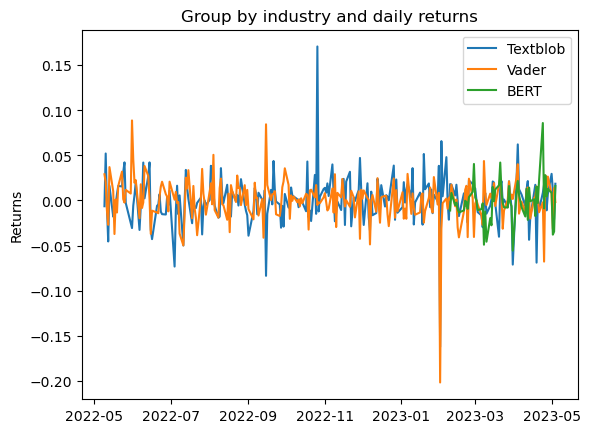

In [28]:
plt.plot(ret1_blo,label='Textblob')
plt.plot(ret1_vad,label='Vader')
plt.plot(ret1_bert,label='BERT')
plt.ylabel('Returns')
plt.title('Group by industry and daily returns')
plt.legend()

## groupby stock and daily returns

In [29]:
#The procedure is the same as before
avg_vad_score=data.groupby(['date','ticker']).apply(lambda x : x['c_vader'].mean()).reset_index()
avg_blo_score=data.groupby(['date','ticker']).apply(lambda x : x['c_textb'].mean()).reset_index()
ret_stock=data.groupby(['date','ticker']).apply(lambda x : x['return'].mean()).reset_index() #they are all the same 
w_stock=data.groupby(['date','ticker']).apply(lambda x : x['Weight'].mean()).reset_index() #they are all the same 

In [30]:
avg_bert_score=bert_data.groupby(['date','ticker']).apply(lambda x : x['sentiment'].mean()).reset_index()
bert_ret_stock=bert_data.groupby(['date','ticker']).apply(lambda x : x['return'].mean()).reset_index() #they are all the same 
bert_w_stock=bert_data.groupby(['date','ticker']).apply(lambda x : x['Weight'].mean()).reset_index() #they are all the same 

In [31]:
avg_vad_score.rename(columns={0:'vad_score'},inplace=True)
avg_blo_score.rename(columns={0:'blo_score'},inplace=True)
ret_stock.rename(columns={0:'return'},inplace=True)
w_stock.rename(columns={0:'Weight'},inplace=True)

In [32]:
avg_bert_score.rename(columns={0:'bert_score'},inplace=True)
bert_ret_stock.rename(columns={0:'return'},inplace=True)
bert_w_stock.rename(columns={0:'Weight'},inplace=True)

In [33]:
data5=pd.merge(avg_vad_score,avg_blo_score)
data5=pd.merge(data5,ret_stock)
data5=pd.merge(data5,w_stock)

#We create another column where for each day we have the 0.1 and 0.9 quantile of the mean score
data5["vad_quant_up"] = data5.groupby(['date'])['vad_score'].transform(lambda x: x.quantile(0.9))
data5["vad_quant_down"] = data5.groupby(['date'])['vad_score'].transform(lambda x: x.quantile(0.1))
data5["blo_quant_up"] = data5.groupby(['date'])['blo_score'].transform(lambda x: x.quantile(0.9))
data5["blo_quant_down"] = data5.groupby(['date'])['blo_score'].transform(lambda x: x.quantile(0.1))


In [34]:
bert_data5=pd.merge(avg_bert_score,bert_ret_stock)
bert_data5=pd.merge(bert_data5,bert_w_stock)
bert_data5["bert_quant_up"] = bert_data5.groupby(['date'])['bert_score'].transform(lambda x: x.quantile(0.9))
bert_data5["bert_quant_down"] = bert_data5.groupby(['date'])['bert_score'].transform(lambda x: x.quantile(0.1))

In [35]:
#We create another column with 1 if the average score of the stock in that day is 
#higher than 0.9 quantile, -1 if the average score is lower than 0.1 quantile and 0
#otherwise
data5['up_down_vad']=0
data5['up_down_blo']=0
data5['up_down_vad'][data5['vad_score']>=data5['vad_quant_up']]=1
data5['up_down_vad'][data5['vad_score']<=data5['vad_quant_down']]=-1
data5['up_down_blo'][data5['blo_score']>=data5['blo_quant_up']]=1
data5['up_down_blo'][data5['blo_score']<=data5['blo_quant_down']]=-1

/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/1078265181.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['up_down_vad'][data5['vad_score']>=data5['vad_quant_up']]=1
/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/1078265181.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['up_down_vad'][data5['vad_score']<=data5['vad_quant_down']]=-1
/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/1078265181.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [36]:
bert_data5['up_down_bert']=0
bert_data5['up_down_bert']=0
bert_data5['up_down_bert'][bert_data5['bert_score']>=bert_data5['bert_quant_up']]=1
bert_data5['up_down_bert'][bert_data5['bert_score']<=bert_data5['bert_quant_down']]=-1

/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/2077005829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_data5['up_down_bert'][bert_data5['bert_score']>=bert_data5['bert_quant_up']]=1
/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/2077005829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_data5['up_down_bert'][bert_data5['bert_score']<=bert_data5['bert_quant_down']]=-1


In [37]:
#We create a vector of weights for a stategy that goes long (with weights summing up to 1) in the
#top quantile stocks and shorts (with weights summing up to 1) the bottom quantile stocks
data5['wm_quant_vad'] = data5['Weight']*data5['up_down_vad']/data5.groupby(['date','up_down_vad'])['Weight'].transform('sum') #make weights sum up to 1 in top and bottom quantile
data5['wm_quant_blo'] = data5['Weight']*data5['up_down_blo']/data5.groupby(['date','up_down_blo'])['Weight'].transform('sum')

In [38]:
bert_data5['wm_quant_bert'] = bert_data5['Weight']*bert_data5['up_down_bert']/bert_data5.groupby(['date','up_down_bert'])['Weight'].transform('sum')

In [39]:
#We compute the return of the strategy
ret2_vad=data5.groupby('date').apply(lambda x : np.sum(x['return']*x['wm_quant_vad']))
ret2_blo=data5.groupby('date').apply(lambda x : np.sum(x['return']*x['wm_quant_blo']))

In [40]:
ret2_bert=bert_data5.groupby('date').apply(lambda x : np.sum(x['return']*x['wm_quant_bert']))

In [41]:
print(ret2_vad.mean()*252,ret2_blo.mean()*252,ret2_bert.mean()*252)

-0.11918046538465382 0.12023641481680813 0.4728635861392332


In [42]:
print(ret2_vad.std()*np.sqrt(252),ret2_blo.std()*np.sqrt(252),ret2_bert.std()*np.sqrt(252))

0.17229956114245354 0.23372734950025828 0.1524622188091705


In [43]:
np.corrcoef(ret2_vad,ret2_blo)

array([[1.        , 0.18966539],
       [0.18966539, 1.        ]])

In [44]:
ret2_vad.name = 'ret2_vad'
ret2_vad.reset_index()
df=df.merge(ret2_vad,right_on='date',left_on='date',how='inner')
model2vad=sm.OLS(df['ret2_vad'],df[['const','excess']]).fit()
IR1_vad=model2vad.params[0]*252/(np.std(model2vad.resid.values)*np.sqrt(252))
ret2_blo.name = 'ret2_blo'
ret2_blo.reset_index()
df=df.merge(ret2_blo,right_on='date',left_on='date',how='inner')
model2blo=sm.OLS(df['ret2_blo'],df[['const','excess']]).fit()
IR1_blo=model2blo.params[0]*252/(np.std(model2blo.resid.values)*np.sqrt(252))
ret2_bert.name = 'ret2_bert'
ret2_bert.reset_index()
df1=df.merge(ret2_bert,right_on='date',left_on='date',how='inner')
model2bert=sm.OLS(df1['ret2_bert'],df1[['const','excess']]).fit()
IR1_bert=model2bert.params[0]*252/(np.std(model2bert.resid.values)*np.sqrt(252))

In [45]:

print(IR1_vad,IR1_blo,IR1_bert)

-0.7512649675658444 0.3159683404728313 3.127100701299324


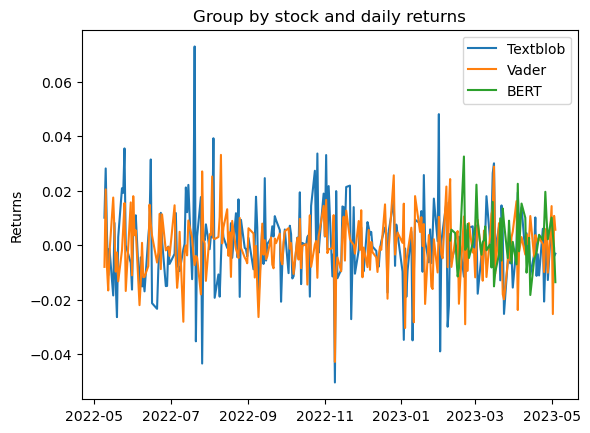

In [46]:
plt.plot(ret2_blo,label='Textblob')
plt.plot(ret2_vad,label='Vader')
plt.plot(ret2_bert,label='BERT')
plt.ylabel('Returns')
plt.title('Group by stock and daily returns')
plt.legend()

## Groupby industry and weekly returns

In [47]:
# Get list of tickers for S&P 500 stocks
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
tickers = df['Symbol'].tolist()
end_date = datetime.strptime('2023-05-08', '%Y-%m-%d')
start_date = datetime.strptime('2022-05-07', '%Y-%m-%d')
data = []

for ticker in tickers:
    try:
        # Fetch historical data for the ticker
        stock = yf.Ticker(ticker)
        history = stock.history(start=start_date, end=end_date)

        if not history.empty:
            # Calculate daily returns
            history['Return'] = history['Close'] / history['Close'].shift(1) - 1

            # Iterate over each row of historical data
            for index, row in history.iterrows():
                #dates of the returns are already shifted back, in this case by a week, 
                #because we want to use them for comments of the week before
                date = pd.to_datetime(index.strftime('%Y-%m-%d'))-timedelta(days=7)
                stock_return = row['Return']
                data.append([date, ticker, stock_return])

            print(f"Retrieved data for {ticker}")
        else:
            print(f"No data available for {ticker}")
    except:
        print(f"Error retrieving data for {ticker}")

df = pd.DataFrame(data, columns=['date', 'ticker', 'return'])

df['date']=pd.to_datetime(df['date'])
df=df.dropna()

Retrieved data for MMM
Retrieved data for AOS
Retrieved data for ABT
Retrieved data for ABBV
Retrieved data for ACN
Retrieved data for ATVI
Retrieved data for ADM
Retrieved data for ADBE
Retrieved data for ADP
Retrieved data for AAP
Retrieved data for AES
Retrieved data for AFL
Retrieved data for A
Retrieved data for APD
Retrieved data for AKAM
Retrieved data for ALK
Retrieved data for ALB
Retrieved data for ARE
Retrieved data for ALGN
Retrieved data for ALLE
Retrieved data for LNT
Retrieved data for ALL
Retrieved data for GOOGL
Retrieved data for GOOG
Retrieved data for MO
Retrieved data for AMZN
Retrieved data for AMCR
Retrieved data for AMD
Retrieved data for AEE
Retrieved data for AAL
Retrieved data for AEP
Retrieved data for AXP
Retrieved data for AIG
Retrieved data for AMT
Retrieved data for AWK
Retrieved data for AMP
Retrieved data for ABC
Retrieved data for AME
Retrieved data for AMGN
Retrieved data for APH
Retrieved data for ADI
Retrieved data for ANSS
Retrieved data for AON
R

In [48]:
#Then we use the same appoach as before for the case of daily return and grouping by industry
#but this time with weekly returns
data2=pd.merge(weights,data1, on="ticker", how="right")
data=pd.merge(df,data2,on=['ticker','date'],how='right')
data=data.dropna()

In [49]:
bert_data2=pd.merge(weights,bert_data1, on="ticker", how="right")
bert_data=pd.merge(df,bert_data2,on=['ticker','date'],how='right')
bert_data=bert_data.dropna()

In [50]:
data.set_index('date',inplace=True)
#transform to log returns
data['return']=np.log(1+data['return'])

In [51]:
bert_data.set_index('date',inplace=True)
#transform to log returns
bert_data['return']=np.log(1+bert_data['return'])

In [52]:
avg_vad_score=data.groupby([pd.Grouper(freq='W'),'ticker']).apply(lambda x: x['c_vader'].mean()).reset_index()
avg_blo_score=data.groupby([pd.Grouper(freq='W'),'ticker']).apply(lambda x: x['c_textb'].mean()).reset_index()
ret_stock=data.groupby([pd.Grouper(freq='W'),'ticker']).apply(lambda x: x['return'].sum()).reset_index()
w_stock=data.groupby([pd.Grouper(freq='W'),'ticker']).apply(lambda x: x['Weight'].mean()).reset_index()

In [53]:
avg_bert_score=bert_data.groupby([pd.Grouper(freq='W'),'ticker']).apply(lambda x: x['sentiment'].mean()).reset_index()
bert_ret_stock=bert_data.groupby([pd.Grouper(freq='W'),'ticker']).apply(lambda x: x['return'].sum()).reset_index()
bert_w_stock=bert_data.groupby([pd.Grouper(freq='W'),'ticker']).apply(lambda x: x['Weight'].mean()).reset_index()

In [54]:
avg_vad_score.rename(columns={0:'vad_score'},inplace=True)
avg_blo_score.rename(columns={0:'blo_score'},inplace=True)
ret_stock.rename(columns={0:'return'},inplace=True)
w_stock.rename(columns={0:'Weight'},inplace=True)

In [55]:
avg_bert_score.rename(columns={0:'bert_score'},inplace=True)
bert_ret_stock.rename(columns={0:'return'},inplace=True)
bert_w_stock.rename(columns={0:'Weight'},inplace=True)

In [56]:
#transform back from log returns to regular returns
ret_stock['return']=np.exp(ret_stock['return'])-1

In [57]:
bert_ret_stock['return']=np.exp(bert_ret_stock['return'])-1

In [58]:
data6=pd.merge(avg_vad_score,avg_blo_score)
data6=pd.merge(data6,ret_stock)
data6=pd.merge(data6,w_stock)


In [59]:
bert_data6=pd.merge(avg_bert_score,bert_ret_stock)
bert_data6=pd.merge(bert_data6,bert_w_stock)

In [60]:
data6["vad_quant_up"] = data6.groupby(['date'])['vad_score'].transform(lambda x: x.quantile(0.9))
data6["vad_quant_down"] = data6.groupby(['date'])['vad_score'].transform(lambda x: x.quantile(0.1))
data6["blo_quant_up"] = data6.groupby(['date'])['blo_score'].transform(lambda x: x.quantile(0.9))
data6["blo_quant_down"] = data6.groupby(['date'])['blo_score'].transform(lambda x: x.quantile(0.1))

In [61]:
bert_data6["bert_quant_up"] = bert_data6.groupby(['date'])['bert_score'].transform(lambda x: x.quantile(0.9))
bert_data6["bert_quant_down"] = bert_data6.groupby(['date'])['bert_score'].transform(lambda x: x.quantile(0.1))


In [62]:
data6['up_down_vad']=0
data6['up_down_blo']=0
data6['up_down_vad'][data6['vad_score']>=data6['vad_quant_up']]=1
data6['up_down_vad'][data6['vad_score']<=data6['vad_quant_down']]=-1
data6['up_down_blo'][data6['blo_score']>=data6['blo_quant_up']]=1
data6['up_down_blo'][data6['blo_score']<=data6['blo_quant_down']]=-1

/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/1081382571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6['up_down_vad'][data6['vad_score']>=data6['vad_quant_up']]=1
/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/1081382571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6['up_down_vad'][data6['vad_score']<=data6['vad_quant_down']]=-1
/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/1081382571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [63]:
bert_data6['up_down_bert']=0
bert_data6['up_down_bert'][bert_data6['bert_score']>=bert_data6['bert_quant_up']]=1
bert_data6['up_down_bert'][bert_data6['bert_score']<=bert_data6['bert_quant_down']]=-1

/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/3960614919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_data6['up_down_bert'][bert_data6['bert_score']>=bert_data6['bert_quant_up']]=1
/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/3960614919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_data6['up_down_bert'][bert_data6['bert_score']<=bert_data6['bert_quant_down']]=-1


In [64]:
data6['wm_quant_vad'] = data6['Weight']*data6['up_down_vad']/data6.groupby(['date','up_down_vad'])['Weight'].transform('sum') #make weights sum up to 1 in top and bottom quantile
data6['wm_quant_blo'] = data6['Weight']*data6['up_down_blo']/data6.groupby(['date','up_down_blo'])['Weight'].transform('sum')

In [65]:
bert_data6['wm_quant_bert'] = bert_data6['Weight']*bert_data6['up_down_bert']/bert_data6.groupby(['date','up_down_bert'])['Weight'].transform('sum')

In [66]:
ret3_vad=data6.groupby('date').apply(lambda x : np.sum(x['return']*x['wm_quant_vad']))
ret3_blo=data6.groupby('date').apply(lambda x : np.sum(x['return']*x['wm_quant_blo']))
ret3_bert=bert_data6.groupby('date').apply(lambda x : np.sum(x['return']*x['wm_quant_bert']))

In [67]:
print(ret3_vad.mean()*52,ret3_blo.mean()*52,ret3_bert.mean()*52)

0.003183663703720382 -0.3124470796723541 -0.27407788667631827


In [68]:
print(ret3_vad.std()*np.sqrt(52),ret3_blo.std()*np.sqrt(52),ret3_bert.std()*np.sqrt(52))

0.12600520595740117 0.30101312338019426 0.22751852076144596


In [69]:
np.corrcoef(ret3_vad,ret3_blo)

array([[ 1.        , -0.12564547],
       [-0.12564547,  1.        ]])

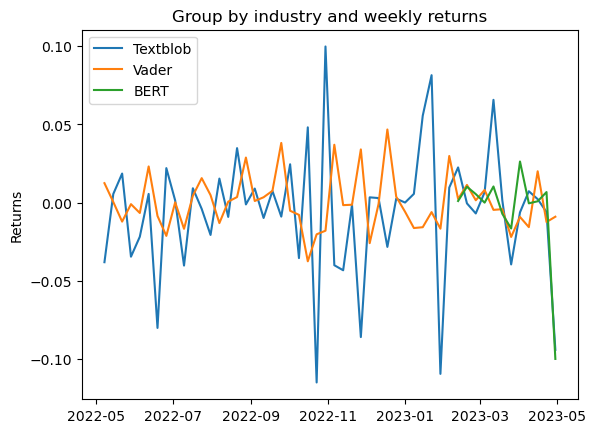

In [70]:
plt.plot(ret3_blo,label='Textblob')
plt.plot(ret3_vad,label='Vader')
plt.plot(ret3_bert,label='BERT')
plt.ylabel('Returns')
plt.title('Group by industry and weekly returns')
plt.legend()

Plot has less high or low return. maybe in this way we can't exploit that some days with high daily returns investing in it and other days with low returns shorting that stocks

On the other hand using daily we would have much higher trading costs

## Daily returns and long or short the s&p500

In [71]:
import pandas_datareader.data as web

#Download the T-Bill data from the U.S. Department of the Treasury to use as risk-free rate
tbill=web.DataReader('TB3MS', 'fred', '2022-05-07', '2023-05-08')
#Forward fill the data if the values are missing for some dates
tbill=tbill.resample('D').ffill()

idx = pd.date_range(start=tbill.index.min(), end='2023-05-08')
tbill = tbill.reindex(idx)

tbill = tbill.fillna(method='ffill')

tbill.reset_index(inplace=True)
tbill.rename(columns={'index': 'date'}, inplace=True)

#Download the S&P 500 data from Yahoo Finance
sp500=yf.download('^GSPC', '2022-05-07', '2023-05-08')

sp500['return']=sp500['Close'].pct_change()

sp500.reset_index(inplace=True)
sp500.rename(columns={'Date': 'date'}, inplace=True)

df=sp500[['date', 'return']]
df['date']=pd.to_datetime(df['date'])
df=pd.merge(df,tbill)
df['date']=pd.to_datetime(df['date'])

#Dates of the returns are already shifted back because we want to use them with comments of the day before.
#Monday returns are shifted back to the previous friday and they will be used with comments of friday,
#Saturday and Sunday 
for i in range(len(df['date'])):
    if df['date'][i].weekday()==0:
        df['date'][i] = df['date'][i]-timedelta(days=3)
    else:
        df['date'][i] = df['date'][i]-timedelta(days=1)

#make risk free rate daily
df['TB3MS']=df['TB3MS']/(252*100)
df['excess']=df['return']-df['TB3MS']

[*********************100%***********************]  1 of 1 completed


/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/2334364387.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])
/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/2334364387.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][i] = df['date'][i]-timedelta(days=1)
/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/2334364387.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [72]:
#Compute the average score of all the stocks in a given day
avg_vad_score=data1.groupby('date').apply(lambda x : x['c_vader'].mean()).reset_index()
avg_blo_score=data.groupby('date').apply(lambda x : x['c_textb'].mean()).reset_index()
avg_bert_score=bert_data1.groupby('date').apply(lambda x : x['sentiment'].mean()).reset_index()

In [73]:
avg_vad_score.rename(columns={0:'vad_score'},inplace=True)
avg_blo_score.rename(columns={0:'blo_score'},inplace=True)
avg_bert_score.rename(columns={0:'bert_score'},inplace=True)

In [74]:
data7=pd.merge(avg_blo_score,avg_vad_score)
data7=pd.merge(data7,df)
data7=data7.dropna()

In [75]:
bert_data7=pd.merge(avg_bert_score,df)
bert_data7=bert_data7.dropna()

In [76]:
mean_vad=data7['vad_score'].mean()
mean_blo=data7['blo_score'].mean()
mean_bert=bert_data7['bert_score'].mean()

In [77]:
#We add a column that is 1 if the score of that day is higher than the average one on the entire period
#and -1 if it is lower
data7['long_short_vad']=1
data7['long_short_blo']=1
data7['long_short_vad'][data7['vad_score']<=mean_vad]=-1
data7['long_short_blo'][data7['blo_score']<=mean_blo]=-1

/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/957908702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data7['long_short_vad'][data7['vad_score']<=mean_vad]=-1
/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/957908702.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data7['long_short_blo'][data7['blo_score']<=mean_blo]=-1


In [78]:
bert_data7['long_short_bert']=1
bert_data7['long_short_bert'][bert_data7['bert_score']<=mean_bert]=-1

/var/folders/xm/v8rw_rk978q4m456yhl9rn_c0000gn/T/ipykernel_39448/3476319249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_data7['long_short_bert'][bert_data7['bert_score']<=mean_bert]=-1


In [79]:
#We compute the return of a strategy that goes long the s&p500 shorting the risk free if the day before the 
#avarage score across all stocks is higher that the avarage score over the period and that short the s&p500 
#investing in the risk free asset otherwise 
data7['ret4_vad']=data7['long_short_vad']*data7['excess']
data7['ret4_blo']=data7['long_short_blo']*data7['excess']
ret4_bert=bert_data7['long_short_bert']*bert_data7['excess']
ret4_bert.index=167+ret4_bert.index

In [80]:
print(data7['ret4_vad'].mean()*252,data7['ret4_blo'].mean()*252,ret4_bert.mean()*252)

0.13990899418717115 0.2789705818204282 -0.4104797435447845


In [81]:
print(data7['ret4_vad'].std()*np.sqrt(252),data7['ret4_blo'].std()*np.sqrt(252),ret4_bert.std()*np.sqrt(252))

0.21785083377797998 0.21731724290544588 0.15086162010850676


In [82]:
np.corrcoef(data7['ret4_vad'],data7['ret4_blo'])

array([[1.        , 0.16007032],
       [0.16007032, 1.        ]])

In [83]:
data7['const']=1
model4vad=sm.OLS(data7['ret4_vad'],data7[['const','excess']]).fit()
IR3_vad=model4vad.params[0]*252/(np.std(model4vad.resid.values)*np.sqrt(252))
model4blo=sm.OLS(data7['ret4_blo'],data7[['const','excess']]).fit()
IR3_blo=model4blo.params[0]*252/(np.std(model4blo.resid.values)*np.sqrt(252))


In [84]:
print(IR3_vad,IR3_blo)

0.6471510157489678 1.3028716017984587


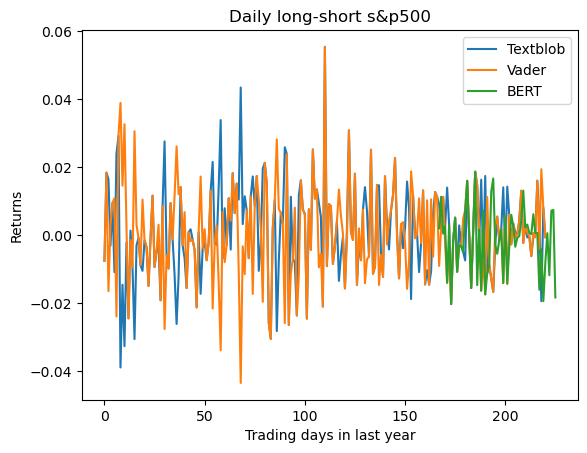

In [85]:
plt.plot(data7['ret4_blo'],label='Textblob')
plt.plot(data7['ret4_vad'],label='Vader')
plt.title('Daily long-short s&p500')
plt.xlabel('Trading days in last year')
plt.ylabel('Returns')
plt.plot(ret4_bert,label='BERT')
plt.legend()